In [1]:
# import cv2
# import os
# import time
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import cross_val_score
# import numpy as np


# def plot_digit_arr(img_data):
#     shape = img_data.shape[0]
#     size = int(shape**0.5)
#     img = img_data.reshape(size, size)
#     plt.imshow(img, cmap="binary")
#     plt.axis("off")

# def split_image_digits(path):
#     img = cv2.imread(path)
#     img1 = img[0:44, 0:92]
#     img2 = img[0:44, 92:184]
#     img3 = img[0:44, 184:276]
#     # img1 = img1.reshape(-1, 4048).astype(np.int8)
#     # img2 = img2.reshape(-1, 4048).astype(np.int8)
#     # img3 = img3.reshape(-1, 4048).astype(np.int8)
#     return img1, img2, img3

# def crop_images(paths):
#     i = 0
#     img_dir = os.path.join(os.getcwd(), "datasets", "images")
#     if not os.path.exists(img_dir):
#         os.mkdir(img_dir)
#     for path in paths:
#         i += 1
#         new_img_path = os.path.join(img_dir, "img{}.png".format(i))
#         img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         img = img_data[0:45, 0:278]
#         cv2.imwrite(new_img_path, img)

# def create_image_data(img_dirname, outdirname="newer_images"):
#     imgs = []
#     images_dir = os.path.join(os.getcwd(), "datasets", img_dirname)
#     outdir = os.path.join(os.getcwd(), "datasets", outdirname)
#     if not os.path.exists(outdir):
#         os.mkdir(outdir)
#     paths = [os.path.join(images_dir, p) for p in os.listdir(images_dir)]
#     crop_images(paths)
#     i = 0
#     for path in paths:
#         img1, img2, img3 = split_image_digits(path)
#         path1 = os.path.join(outdir, "image{}.png".format(i+1))
#         path2 = os.path.join(outdir, "image{}.png".format(i+2))
#         path3 = os.path.join(outdir, "image{}.png".format(i+3))
#         cv2.imwrite(path1, img1)
#         cv2.imwrite(path2, img2)
#         cv2.imwrite(path3, img3)
#         imgs.append(img1)
#         imgs.append(img2)
#         imgs.append(img3)
#         i += 3
#     return imgs

# def imgs_to_dict(dirname):
#     img_dict = {}
#     image_dir = os.path.join(os.getcwd(), "datasets", dirname)
#     i = 0
#     for fname in os.listdir(image_dir):
#         img_path = os.path.join(image_dir, fname)
#         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         img_dict["image{}".format(i+1)] = img
#         i += 1
#     return img_dict

# imgs = create_image_data("images")
# print(imgs)

In [2]:
import os
import pandas as pd
import numpy as np
import cv2


def normalize_img(img):
    img = img * 1.0/255
    return img

def imgs_to_dict(image_dir):
    img_dict = {}
    for fname in os.listdir(image_dir):
        img_path = os.path.join(image_dir, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        name = fname.split(".")[0]
        idx = name.split("image")[-1]
        img_dict[idx] = img
    return img_dict

def images_to_arr(obj):
    imgs = []
    if isinstance(obj, dict):
        imgs = [normalize_img(img) for img in obj.values()]
    elif isinstance(obj, str):
        dir_path = None 
        if os.path.isdir(imgs):
            dir_path = imgs
        else:
            dir_path = os.path.join(os.getcwd(), obj)
        for fname in sorted(os.listdir(dir_path)):
            img_path = os.path.join(dir_path, fname)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = normalize_img(img)
            imgs.append(img)
    else:
        raise TypeError(f"type {type(obj)} is not supported")
    return np.array(imgs)


(44, 92)


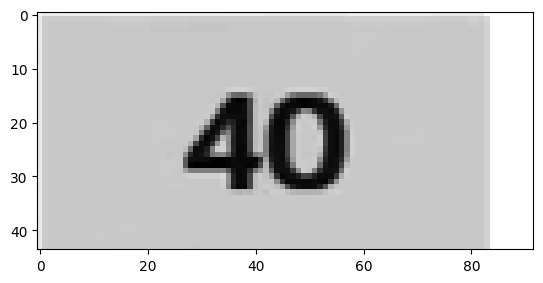

In [3]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt


image_dir = os.path.join(os.getcwd(), "integer_images")
img1_path = os.path.join(image_dir, "image40.png")
img1 = cv2.imread(img1_path)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

print(img1.shape)

plt.imshow(img1, cmap="binary")

In [4]:
import os
import numpy as np

dirpath = os.path.join(os.getcwd(), "integer_images")

d = imgs_to_dict(dirpath)
a = images_to_arr(d)
targets = np.array([int(i) for i in list(d.keys())])
labels = [i for i in list(d.keys())]
labels = list(set(labels))
print(labels)
label_file = os.path.join(os.getcwd(), "labels.txt")
# with open(label_file, "w") as fh:
#     for label in reversed(sorted(labels)):
#         fh.write(str(label))
#         fh.write("\n")

x_train, x_test = a[:30], a[30:40]
y_train, y_test = np.array(targets[:30]), np.array(targets[30:40]) 
x_val, y_val = np.array(a[40:50]), np.array(targets[40:50])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

['81', '27', '42', '83', '88', '85', '89', '45', '123', '49', '61', '28', '35', '121', '72', '39', '63', '67', '78', '113', '66', '38', '79', '76', '87', '48', '120', '33', '60', '70', '69', '119', '77', '30', '73', '31', '75', '112', '53', '34', '74', '122', '36', '90', '57', '32', '40', '52', '29', '129', '80']
(30, 44, 92)
(30,)
(10, 44, 92)
(10,)
(10, 44, 92)
(10,)


In [5]:
from tensorflow import keras
import tensorflow as tf

data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(44, 92, 1)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

def build_model(input_shape, n_outputs):
    model = tf.keras.Sequential([
        #data_augmentation,
        tf.keras.layers.Reshape(target_shape=(input_shape[0], input_shape[1], 1)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        #tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(n_outputs, activation="softmax")
    ])
    model.compile(optimizer='adam',
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    return model

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(44, 92)),
#     keras.layers.Dense(128, activation=tf.nn.relu),

# # Optional: You can replace the dense layer above with the convolution layers below to get higher accuracy.
#     # keras.layers.Reshape(target_shape=(28, 28, 1)),
#     # keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
#     # keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
#     # keras.layers.MaxPooling2D(pool_size=(2, 2)),
#     # keras.layers.Dropout(0.25),
#     # keras.layers.Flatten(input_shape=(28, 28)),
#     # keras.layers.Dense(128, activation=tf.nn.relu),
#     # keras.layers.Dropout(0.5),

#     keras.layers.Dense(200)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model = build_model((44, 92), 130)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=60)
# model.evaluate(x_val, y_val)
scores = history.history
loss = np.average(scores["loss"])
accuracy = np.average(scores["accuracy"])
print("Loss Average: {}".format(loss))
print("Accuracy Average: {}".format(accuracy))
print("Loss: {}".format(scores["loss"][-1]))
print("Accuracy: {}".format(scores["accuracy"][-1]))

Epoch 1/60
1/1 [==============================] - 1s 533ms/step - loss: 4.8733 - accuracy: 0.0000e+00 - val_loss: 4.8996 - val_accuracy: 0.0000e+00
Epoch 2/60
1/1 [==============================] - 0s 49ms/step - loss: 4.7572 - accuracy: 0.0000e+00 - val_loss: 4.9563 - val_accuracy: 0.0000e+00
Epoch 3/60
1/1 [==============================] - 0s 48ms/step - loss: 4.6027 - accuracy: 0.0333 - val_loss: 5.1184 - val_accuracy: 0.0000e+00
Epoch 4/60
1/1 [==============================] - 0s 56ms/step - loss: 4.4137 - accuracy: 0.0333 - val_loss: 5.4719 - val_accuracy: 0.0000e+00
Epoch 5/60
1/1 [==============================] - 0s 48ms/step - loss: 4.2387 - accuracy: 0.0333 - val_loss: 6.0733 - val_accuracy: 0.0000e+00
Epoch 6/60
1/1 [==============================] - 0s 48ms/step - loss: 4.1109 - accuracy: 0.0667 - val_loss: 6.6608 - val_accuracy: 0.0000e+00
Epoch 7/60
1/1 [==============================] - 0s 64ms/step - loss: 3.9913 - accuracy: 0.0667 - val_loss: 7.0102 - val_accuracy: 0

In [2]:
import os
import pathlib
from pycoral.utils import edgetpu
from pycoral.utils import dataset
from pycoral.adapters import common
from pycoral.adapters import classify
from PIL import Image

# Specify the TensorFlow model, labels, and image
script_dir = os.path.join(os.getcwd(),)
model_file = os.path.join(script_dir, 'model_quantized.tflite')
label_file = os.path.join(script_dir, 'labels.txt')
image_file = os.path.join(script_dir, 'image112.png')

# Initialize the TF interpreter
interpreter = edgetpu.make_interpreter(model_file)
interpreter.allocate_tensors()

# Resize the image
size = common.input_size(interpreter)
image = Image.open(image_file).convert('RGB').resize(size, Image.ANTIALIAS)

# Run an inference
common.set_input(interpreter, image)
interpreter.invoke()
classes = classify.get_classes(interpreter, top_k=1)

# Print the result
labels = dataset.read_label_file(label_file)
for c in classes:
  print('%s: %.5f' % (labels.get(c.id, c.id), c.score))

In [1]:
# A generator that provides a representative dataset
def representative_data_gen():
  dirname = os.path.join(os.getcwd(), "integer_images")
  dataset_list = tf.data.Dataset.list_files(dirname + '/*/*')
  for i in range(100):
    image = next(iter(dataset_list))
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [44, 92])
    image = tf.cast(image / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

saved_keras_model = 'models\\model.h5'
model.save(saved_keras_model)

converter = tf.lite.TFLiteConverter.from_keras_model(saved_keras_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# These set the input and output tensors to uint8
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
# And this sets the representative dataset so we can quantize the activations
converter.representative_dataset = representative_data_gen
tflite_model = converter.convert()
model_file = os.path.join(os.getcwd(), "models", "model.tflite")
with open(model_file, 'wb') as f:
  f.write(tflite_model)

In [ ]:
import numpy as np
import cv2 as cv
import os
 
img_path = os.path.join(os.getcwd(), "datasets", "digits", "digits.png")
img = cv.imread(img_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
x = np.array(cells)
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
print(gray.shape)
print(x.shape)
print("\n")
print(train.shape)
print(test.shape)

(1000, 2000)
(50, 100, 20, 20)


(2500, 400)
(2500, 400)


In [ ]:
import numpy as np
import cv2 as cv
import os
 
img_path = os.path.join(os.getcwd(), "datasets", "digits", "digits.png")
img = cv.imread(img_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
 
# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)
 
# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
 
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
 
# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
 
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

# Save the data
np.savez('knn_data.npz',train=train, train_labels=train_labels)
 
# Now load the data
with np.load('knn_data.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']